<a href="https://colab.research.google.com/github/jihadkaka/Machine_Learning/blob/main/knn___rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/customer_churn_dataset-testing-master.csv')

In [ ]:
# Show basic info
print("Training Data Shape:", df.shape)

# Show first few rows
print("\nFirst few rows of training data:")
print(df.head())

# Check for missing values
print("\nMissing values in training data:")
print(df.isnull().sum())


df.shape


Training Data Shape: (64374, 12)

First few rows of training data:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21   

(64374, 12)

In [ ]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Drop CustomerID as it's not a useful feature for modeling
X = X.drop('CustomerID', axis=1)

KeyError: "['CustomerID'] not found in axis"

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:

categorical_cols = X.select_dtypes(include='object').columns


X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric after one-hot encoding
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 3. Normalize for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy: 0.930252427184466
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6786
           1       0.93      0.92      0.93      6089

    accuracy                           0.93     12875
   macro avg       0.93      0.93      0.93     12875
weighted avg       0.93      0.93      0.93     12875



In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.9972815533980582
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6786
           1       1.00      0.99      1.00      6089

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [ ]:
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
# Get only numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:\n", numeric_cols)

# Get only categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", categorical_cols)

Numeric columns:
 Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
Categorical columns:
 Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


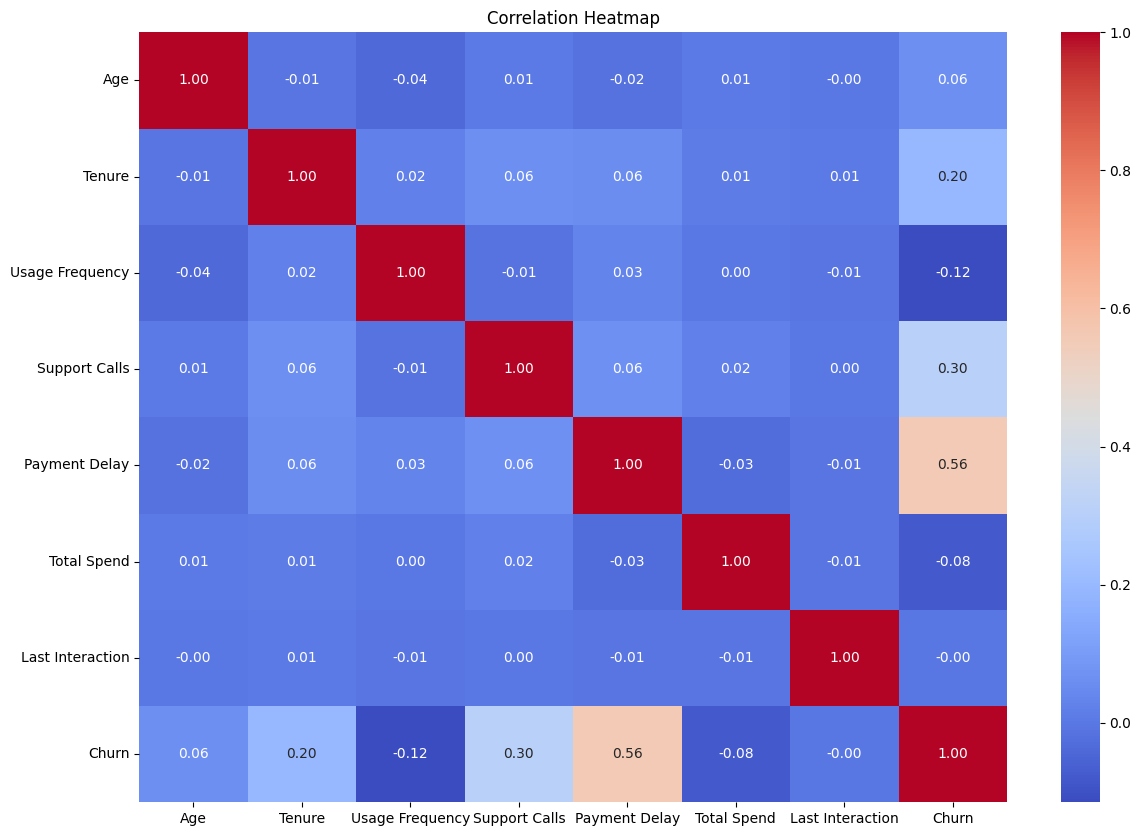

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))  # adjust size as needed
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()